C:\Users\12397\AppData\Local\Temp\ipykernel_30356\3685119640.py:116: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=curved_edges, width=1.5, style='dashed', connectionstyle='arc3,rad=0.2')
C:\Users\12397\AppData\Local\Temp\ipykernel_30356\3685119640.py:153: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\12397\AppData\Local\Temp\ipykernel_30356\3685119640.py:153: UserWarning: Glyph 36710 (\N{CJK UNIFIED IDEOGRAPH-8F66}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\12397\AppData\Local\Temp\ipykernel_30356\3685119640.py:153: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) Arial.
  plt.tight_layout()

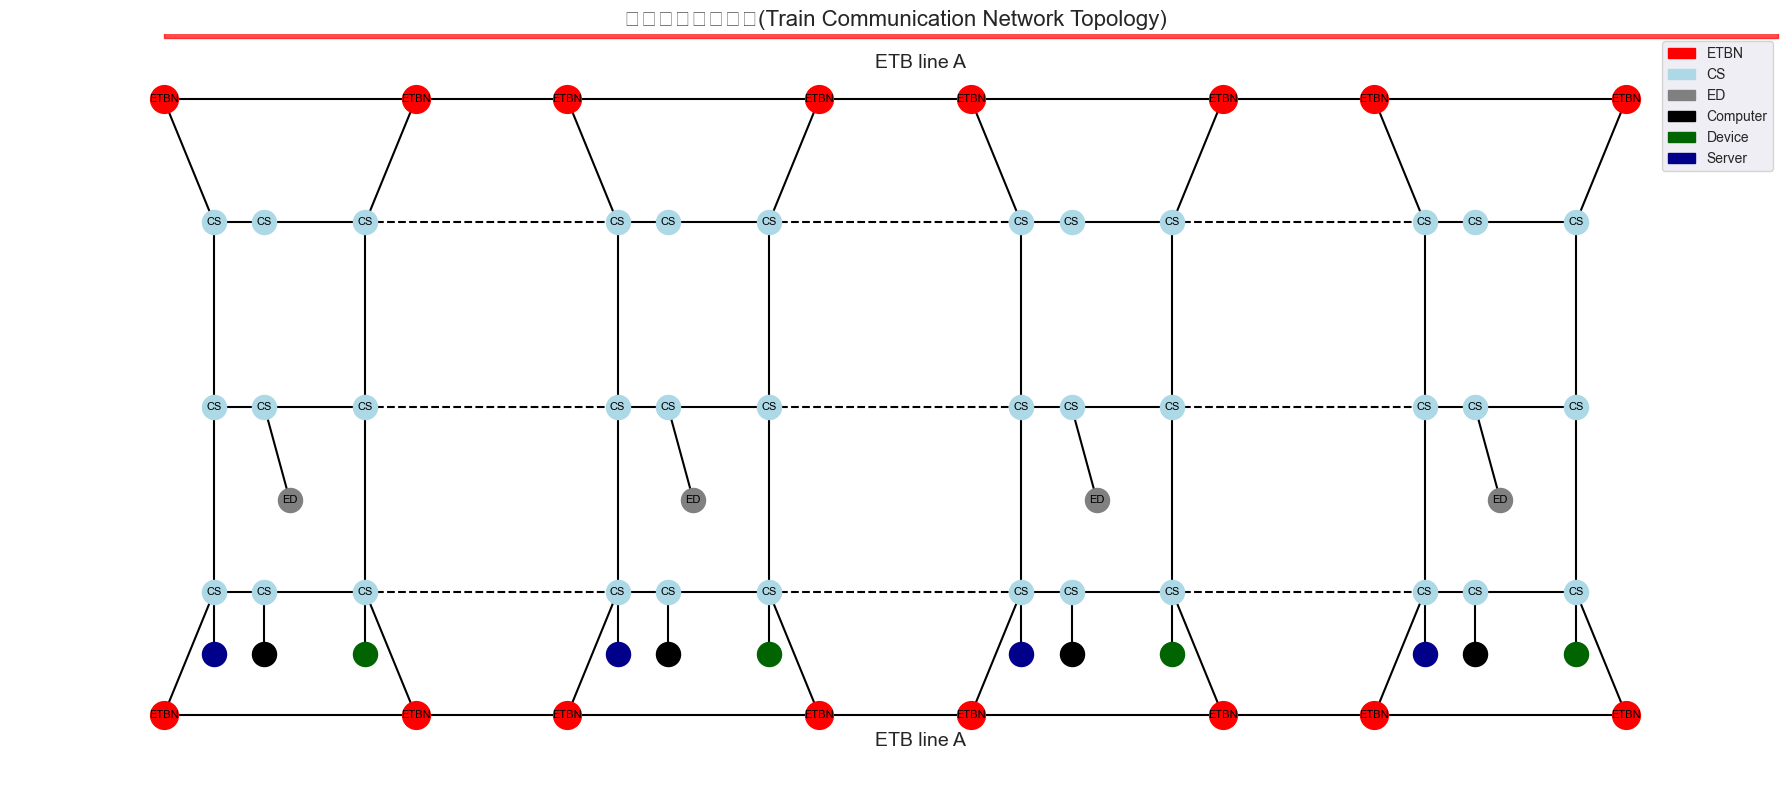

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 创建图形
G = nx.Graph()

# 定义节点类型和位置
def add_train_section(G, offset, section_id):
    # ETB节点(上部)
    G.add_node(f"ETBN_top1_{section_id}", type="ETBN", pos=(offset, 10))
    G.add_node(f"ETBN_top2_{section_id}", type="ETBN", pos=(offset+5, 10))
    
    # ETB节点(下部)
    G.add_node(f"ETBN_bottom1_{section_id}", type="ETBN", pos=(offset, 0))
    G.add_node(f"ETBN_bottom2_{section_id}", type="ETBN", pos=(offset+5, 0))
    
    # CS节点(控制系统)
    # 上半部分
    G.add_node(f"CS_top1_{section_id}", type="CS", pos=(offset+1, 8))
    G.add_node(f"CS_top2_{section_id}", type="CS", pos=(offset+2, 8))
    G.add_node(f"CS_top3_{section_id}", type="CS", pos=(offset+4, 8))
    
    # 中间部分
    G.add_node(f"CS_mid1_{section_id}", type="CS", pos=(offset+1, 5))
    G.add_node(f"CS_mid2_{section_id}", type="CS", pos=(offset+2, 5))
    G.add_node(f"CS_mid3_{section_id}", type="CS", pos=(offset+4, 5))
    
    # 下半部分
    G.add_node(f"CS_bottom1_{section_id}", type="CS", pos=(offset+1, 2))
    G.add_node(f"CS_bottom2_{section_id}", type="CS", pos=(offset+2, 2))
    G.add_node(f"CS_bottom3_{section_id}", type="CS", pos=(offset+4, 2))
    
    # 设备节点(ED)
    G.add_node(f"ED_{section_id}", type="ED", pos=(offset+2.5, 3.5))
    
    # 添加其他设备(计算机、设备)
    G.add_node(f"Computer_{section_id}", type="Computer", pos=(offset+2, 1))
    G.add_node(f"Device_{section_id}", type="Device", pos=(offset+4, 1))
    G.add_node(f"Server_{section_id}", type="Server", pos=(offset+1, 1))
    
    # ETB线路连接
    G.add_edge(f"ETBN_top1_{section_id}", f"ETBN_top2_{section_id}")
    G.add_edge(f"ETBN_bottom1_{section_id}", f"ETBN_bottom2_{section_id}")
    
    # ETBN连接到CS
    G.add_edge(f"ETBN_top1_{section_id}", f"CS_top1_{section_id}")
    G.add_edge(f"ETBN_top2_{section_id}", f"CS_top3_{section_id}")
    G.add_edge(f"ETBN_bottom1_{section_id}", f"CS_bottom1_{section_id}")
    G.add_edge(f"ETBN_bottom2_{section_id}", f"CS_bottom3_{section_id}")
    
    # CS节点连接
    # 上部CS连接
    G.add_edge(f"CS_top1_{section_id}", f"CS_top2_{section_id}")
    G.add_edge(f"CS_top2_{section_id}", f"CS_top3_{section_id}")
    
    # 中部CS连接
    G.add_edge(f"CS_mid1_{section_id}", f"CS_mid2_{section_id}")
    G.add_edge(f"CS_mid2_{section_id}", f"CS_mid3_{section_id}")
    
    # 下部CS连接
    G.add_edge(f"CS_bottom1_{section_id}", f"CS_bottom2_{section_id}")
    G.add_edge(f"CS_bottom2_{section_id}", f"CS_bottom3_{section_id}")
    
    # 垂直CS连接
    G.add_edge(f"CS_top1_{section_id}", f"CS_mid1_{section_id}")
    G.add_edge(f"CS_mid1_{section_id}", f"CS_bottom1_{section_id}")
    G.add_edge(f"CS_top3_{section_id}", f"CS_mid3_{section_id}")
    G.add_edge(f"CS_mid3_{section_id}", f"CS_bottom3_{section_id}")
    
    # ED连接
    G.add_edge(f"CS_mid2_{section_id}", f"ED_{section_id}")
    
    # 其他设备连接
    G.add_edge(f"CS_bottom2_{section_id}", f"Computer_{section_id}")
    G.add_edge(f"CS_bottom3_{section_id}", f"Device_{section_id}")
    G.add_edge(f"CS_bottom1_{section_id}", f"Server_{section_id}")
    
    # 车厢间椭圆连接
    if section_id > 1:
        G.add_edge(f"CS_top3_{section_id-1}", f"CS_top1_{section_id}", style="curved")
        G.add_edge(f"CS_mid3_{section_id-1}", f"CS_mid1_{section_id}", style="curved")
        G.add_edge(f"CS_bottom3_{section_id-1}", f"CS_bottom1_{section_id}", style="curved")

# 添加4个车厢部分
for i in range(1, 5):
    add_train_section(G, (i-1)*8, i)
    
    # 连接相邻段的ETB节点
    if i > 1:
        G.add_edge(f"ETBN_top2_{i-1}", f"ETBN_top1_{i}")
        G.add_edge(f"ETBN_bottom2_{i-1}", f"ETBN_bottom1_{i}")

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 创建图形
plt.figure(figsize=(18, 8))

# 绘制不同类型的节点
node_types = {"ETBN": 'red', "CS": 'lightblue', "ED": 'gray', 
              "Computer": 'black', "Device": 'darkgreen', "Server": 'darkblue'}

for node_type, color in node_types.items():
    nodelist = [n for n, d in G.nodes(data=True) if d.get('type') == node_type]
    nx.draw_networkx_nodes(G, pos, 
                         nodelist=nodelist, 
                         node_color=color, 
                         node_size=400 if node_type == "ETBN" else 300)

# 绘制边
regular_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style') != 'curved']
curved_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style') == 'curved']

nx.draw_networkx_edges(G, pos, edgelist=regular_edges, width=1.5)
nx.draw_networkx_edges(G, pos, edgelist=curved_edges, width=1.5, style='dashed', connectionstyle='arc3,rad=0.2')

# 添加标签
labels = {}
for node in G.nodes():
    if "ETBN" in node:
        labels[node] = "ETBN"
    elif "CS" in node:
        labels[node] = "CS"
    elif "ED" in node:
        labels[node] = "ED"
    else:
        labels[node] = ""

nx.draw_networkx_labels(G, pos, labels, font_size=8)

# 添加顶部和底部的ETB线路标签
plt.text(15, 10.5, "ETB line A", fontsize=14, ha='center')
plt.text(15, -0.5, "ETB line A", fontsize=14, ha='center')

# 添加图例
legend_elements = [
    mpatches.Patch(color='red', label='ETBN'),
    mpatches.Patch(color='lightblue', label='CS'),
    mpatches.Patch(color='gray', label='ED'),
    mpatches.Patch(color='black', label='Computer'),
    mpatches.Patch(color='darkgreen', label='Device'),
    mpatches.Patch(color='darkblue', label='Server')
]
plt.legend(handles=legend_elements, loc='upper right')

# 添加列车图形(简化表示)
train_img = plt.Rectangle((0, 11), 32, 1, fill=True, color='red', alpha=0.7)
plt.gca().add_patch(train_img)

plt.title("列车通信网络拓扑(Train Communication Network Topology)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

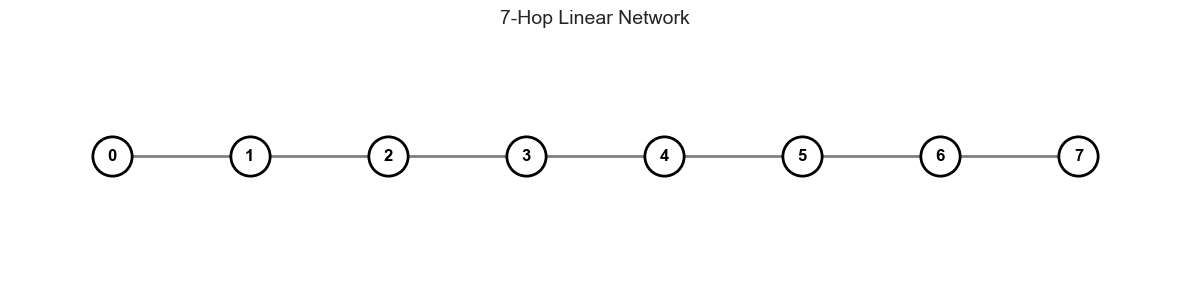

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import os

# 创建输出文件夹
output_dir = "output_image"
os.makedirs(output_dir, exist_ok=True)

# 创建8个节点的链式拓扑（7跳）
G = nx.path_graph(8)  # 注意：8个节点形成7条边（7跳）

# 设置节点位置（水平排列）
pos = {i: (i, 0) for i in range(8)}

# 创建图形
plt.figure(figsize=(12, 3))

# 绘制所有节点（黑色边框，白色填充）
nx.draw_networkx_nodes(
    G, pos,
    node_size=800,
    node_color='white',
    edgecolors='black',
    linewidths=2
)

# 绘制所有边
nx.draw_networkx_edges(
    G, pos,
    width=2,
    edge_color='gray'
)

# 显示节点标签
nx.draw_networkx_labels(
    G, pos,
    font_weight='bold'
)

plt.title("7-Hop Linear Network", fontsize=14)
plt.axis('off')  # 隐藏坐标轴
plt.tight_layout()

# 保存图像（300 DPI）
output_path = os.path.join(output_dir, "7_hop_linear_complete.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


C:\Users\12397\AppData\Local\Temp\ipykernel_30356\2592475039.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


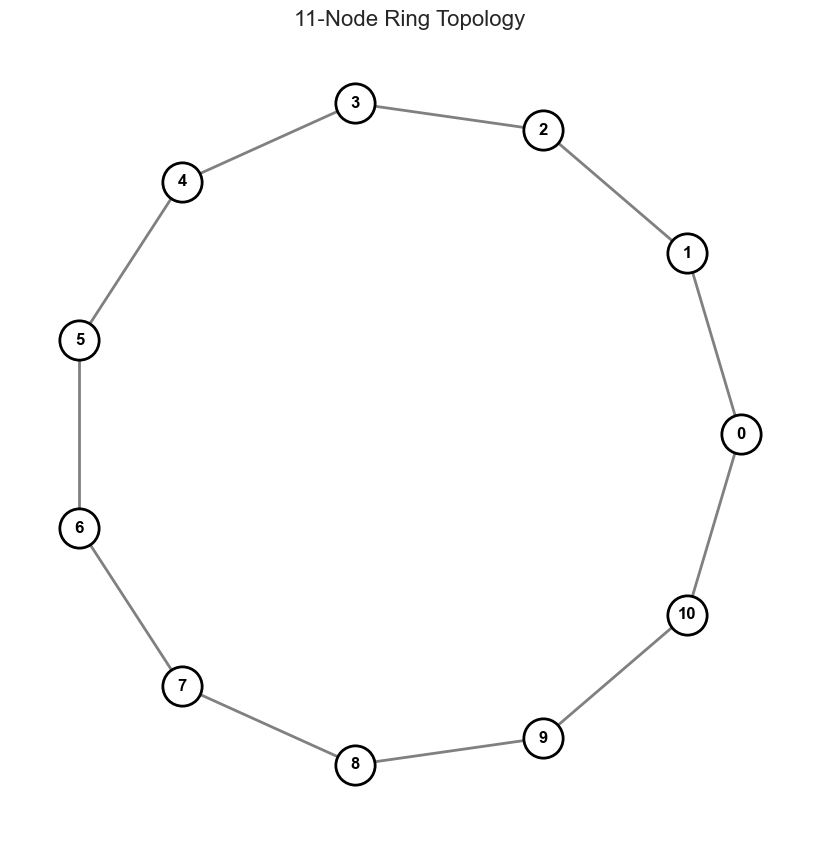

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import os

# 创建输出文件夹（如果不存在）
output_dir = "output_image"
os.makedirs(output_dir, exist_ok=True)

# 创建一个11个节点的Ring拓扑
G = nx.cycle_graph(11)  # 11个节点构成环状网络

# 创建图形
plt.figure(figsize=(8, 8))

# 绘制Ring拓扑
nx.draw_circular(
    G,
    node_size=800,  # 节点大小
    node_color='white',  # 内部填充白色
    edgecolors='black',  # 边框黑色
    linewidths=2,  # 边框线宽
    with_labels=True,  # 显示节点标签
    font_weight='bold',  # 字体加粗
    width=2,  # 边线宽度
    edge_color='gray'  # 边线颜色
)

plt.title("11-Node Ring Topology", fontsize=16)
plt.tight_layout()

# 保存图像（300 DPI）
output_path = os.path.join(output_dir, "11_node_ring.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# 显示图形
plt.show()


In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict

class TSNSimulator:
    def __init__(self, num_nodes=200, sw_ratio=0.2, a=4, k_opt=28, max_rounds=500, initial_resources=100):
        """
        Initialize the TSN simulator with given parameters.
        
        Parameters:
        -----------
        num_nodes : int
            Total number of nodes in the network
        sw_ratio : float
            Proportion of switch (SW) nodes in the network
        a : float
            Multiplier to determine how much more resources SW nodes have compared to ES nodes
        k_opt : int
            Number of master clock nodes (gPTP domains)
        max_rounds : int
            Maximum number of simulation rounds
        initial_resources : float
            Initial traffic resources for ES nodes (SW nodes will have a times this value)
        """
        self.N = num_nodes
        self.m = sw_ratio
        self.a = a
        self.k_opt = k_opt
        self.max_rounds = max_rounds
        self.S0 = initial_resources
        
        # Calculated parameters
        self.P_opt = self.k_opt / self.N
        
        # Network setup
        self.G = nx.DiGraph()
        self.node_types = {}  # 'SW' or 'ES'
        self.resources = {}   # Remaining traffic resources for each node
        self.master_history = defaultdict(int)  # Count of times each node has been a master
        self.timeout_records = set()  # Nodes that have experienced timeout
        self.node_positions = {}  # Positions of nodes in 2D space
        
        # Create the network
        self._create_network()
        
        # Link correlation matrix
        self.link_correlation = {}
        self._compute_link_correlation()
        
        # Results
        self.domain_history = []  # Track domain divisions over rounds
        self.master_history_by_round = []  # Track master nodes by round
        
    def _create_network(self):
        """Create the network topology with SW and ES nodes"""
        # Create nodes
        num_sw = int(self.N * self.m)
        num_es = self.N - num_sw
        
        # Add SW nodes
        for i in range(num_sw):
            self.G.add_node(i)
            self.node_types[i] = 'SW'
            self.resources[i] = self.S0 * (1 + self.a)
            
        # Add ES nodes
        for i in range(num_sw, self.N):
            self.G.add_node(i)
            self.node_types[i] = 'ES'
            self.resources[i] = self.S0
            
        # Place nodes randomly in 2D space
        self.node_positions = {i: (random.uniform(0, 100), random.uniform(0, 100)) for i in range(self.N)}
        
        # Create edges based on proximity
        # Connecting nodes within a certain distance threshold
        distance_threshold = 20  # Adjust as needed
        
        for i in range(self.N):
            for j in range(self.N):
                if i != j:
                    x1, y1 = self.node_positions[i]
                    x2, y2 = self.node_positions[j]
                    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                    
                    if distance < distance_threshold:
                        # Add bidirectional edges for full-duplex communication
                        self.G.add_edge(i, j)
                        self.G.add_edge(j, i)
    
    def _compute_link_correlation(self):
        """Compute the Conditional Packet Receive Probability (CPRP) between nodes"""
        num_probes = 5  # Number of probe messages as in the paper example
        
        for node in self.G.nodes:
            # Get neighbors within 2 hops
            neighbors = set()
            for i in range(1, 3):  # Consider neighbors up to 2 hops away
                neighbors.update(nx.single_source_shortest_path_length(self.G, node, cutoff=i).keys())
            neighbors.discard(node)  # Remove self
            
            if not neighbors:
                continue
                
            # Simulate sending probe messages
            probe_results = {neighbor: [] for neighbor in neighbors}
            
            # Generate probe reception results
            for _ in range(num_probes):
                for neighbor in neighbors:
                    # Reception probability decreases with distance
                    x1, y1 = self.node_positions[node]
                    x2, y2 = self.node_positions[neighbor]
                    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                    success_prob = max(0.1, 1 - (distance / 100))
                    
                    # Record if probe was successfully received
                    probe_results[neighbor].append(1 if random.random() < success_prob else 0)
            
            # Calculate CPRP for each subset of neighbors
            for subset_size in range(1, min(4, len(neighbors)) + 1):
                for subset in self._get_subsets(list(neighbors), subset_size):
                    # Calculate P(subset)
                    subset_prob = 0
                    for i in range(num_probes):
                        if all(probe_results[neighbor][i] == 1 for neighbor in subset):
                            subset_prob += 1
                    subset_prob /= num_probes
                    
                    if subset_prob > 0:
                        # Store the CPRP
                        self.link_correlation[(node, frozenset(subset))] = subset_prob
    
    def _get_subsets(self, s, n):
        """Return all subsets of size n from set s"""
        if n == 0:
            return [[]]
        if not s:
            return []
        return [[s[0]] + subset for subset in self._get_subsets(s[1:], n-1)] + self._get_subsets(s[1:], n)
    
    def _calculate_threshold(self, node, round_num):
        """Calculate the threshold T_i(r) for node i in round r according to equation (3)"""
        # Check if node has been selected as master in the last 1/P_i rounds
        rounds_per_cycle = int(1 / self.P_opt)
        current_cycle = round_num // rounds_per_cycle
        
        # If node has already been a master in this cycle, threshold is 0
        if self.master_history[node] > current_cycle:
            return 0
        
        # Calculate P_i based on node type and resources
        S_avg = sum(self.resources.values()) / self.N
        
        if self.node_types[node] == 'ES':
            # For ES nodes (equation 8)
            P_i = (self.P_opt * self.resources[node]) / ((1 + self.a * self.m) * S_avg)
        else:
            # For SW nodes (equation 9)
            P_i = ((1 + self.a) * self.P_opt * self.resources[node]) / ((1 + self.a * self.m) * S_avg)
        
        # Calculate threshold T_i(r) according to equation (3)
        r_mod = round_num % rounds_per_cycle
        if r_mod == 0:
            r_mod = rounds_per_cycle
            
        threshold = P_i / (1 - P_i * (r_mod - 1))
        
        return min(1, max(0, threshold))  # Ensure threshold is between 0 and 1
    
    def select_master_clocks(self, round_num):
        """Select k_opt master clock nodes for the current round using threshold method"""
        master_clocks = []
        
        # Calculate thresholds for all nodes
        thresholds = {node: self._calculate_threshold(node, round_num) for node in self.G.nodes}
        
        # Select nodes based on thresholds
        for node, threshold in sorted(thresholds.items(), key=lambda x: x[1], reverse=True):
            if len(master_clocks) >= self.k_opt:
                break
                
            if random.random() < threshold:
                master_clocks.append(node)
                self.master_history[node] += 1
        
        # If not enough masters were selected, choose the remaining randomly
        remaining = self.k_opt - len(master_clocks)
        if remaining > 0:
            eligible_nodes = [node for node in self.G.nodes if node not in master_clocks]
            additional_masters = random.sample(eligible_nodes, min(remaining, len(eligible_nodes)))
            
            for node in additional_masters:
                master_clocks.append(node)
                self.master_history[node] += 1
        
        return master_clocks
    
    def generate_domains(self, master_clocks):
        """Generate gPTP domains based on link correlation"""
        domains = {master: {master} for master in master_clocks}
        unassigned = set(self.G.nodes) - set(master_clocks)
        
        # Assign nodes to domains based on link correlation
        while unassigned:
            best_assignment = None
            best_correlation = -1
            
            for node in unassigned:
                for master in master_clocks:
                    # Try to find the best correlation between node and any subset containing the master
                    for subset_key, correlation in self.link_correlation.items():
                        if subset_key[0] == master and node in subset_key[1]:
                            if correlation > best_correlation:
                                best_correlation = correlation
                                best_assignment = (node, master)
                    
                    # If no correlation data, fall back to distance-based assignment
                    if best_assignment is None:
                        x1, y1 = self.node_positions[master]
                        x2, y2 = self.node_positions[node]
                        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                        correlation = 1 / (1 + distance)
                        
                        if correlation > best_correlation:
                            best_correlation = correlation
                            best_assignment = (node, master)
            
            if best_assignment:
                node, master = best_assignment
                domains[master].add(node)
                unassigned.remove(node)
            else:
                # If no correlation can be found, assign remaining nodes randomly
                for node in unassigned:
                    master = random.choice(list(master_clocks))
                    domains[master].add(node)
                unassigned.clear()
        
        return domains
    
    def simulate_round(self, round_num):
        """Simulate one round of time synchronization"""
        # Select master clocks
        master_clocks = self.select_master_clocks(round_num)
        self.master_history_by_round.append(master_clocks)
        
        # Generate domains
        domains = self.generate_domains(master_clocks)
        self.domain_history.append(domains)
        
        # Calculate resource consumption
        for master, domain_nodes in domains.items():
            for node in domain_nodes:
                if node != master:
                    # Calculate Euclidean distance to master
                    x1, y1 = self.node_positions[master]
                    x2, y2 = self.node_positions[node]
                    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                    
                    # Resource consumption proportional to distance and path length
                    try:
                        path_length = nx.shortest_path_length(self.G, source=master, target=node)
                    except nx.NetworkXNoPath:
                        path_length = float('inf')
                    
                    if path_length == float('inf'):
                        # No path exists, skip this node
                        continue
                    
                    # Consumption factor based on distance and path length
                    consumption = distance * 0.05 * path_length
                    
                    # Deduct from remaining resources
                    self.resources[node] -= consumption
                    
                    # Check for timeout
                    if self.resources[node] <= 0:
                        self.timeout_records.add(node)
                        self.resources[node] = 0
    
    def simulate(self):
        """Run the full simulation for max_rounds"""
        timeout_history = []
        
        for round_num in range(1, self.max_rounds + 1):
            self.simulate_round(round_num)
            
            # Calculate current timeout percentage
            timeout_percentage = len(self.timeout_records) / self.N * 100
            timeout_history.append(timeout_percentage)
            
            # Early termination if most nodes have timed out
            if timeout_percentage >= 90:
                break
                
        return timeout_history
    
    def visualize_network(self, round_num=None):
        """Visualize the network topology and gPTP domains"""
        plt.figure(figsize=(12, 10))
        
        # If round_num is provided, visualize that specific round
        if round_num is not None and 0 <= round_num < len(self.domain_history):
            domains = self.domain_history[round_num]
            master_clocks = self.master_history_by_round[round_num]
        elif len(self.domain_history) > 0:
            # Otherwise visualize the latest round
            domains = self.domain_history[-1]
            master_clocks = self.master_history_by_round[-1]
        else:
            # If no domains have been generated yet, create a basic visualization
            pos = self.node_positions
            node_colors = ['blue' if self.node_types[node] == 'SW' else 'green' for node in self.G.nodes]
            
            nx.draw(self.G, pos, with_labels=True, node_color=node_colors, font_size=8, node_size=300)
            plt.title("Network Topology")
            plt.show()
            return
        
        # Assign different colors to different domains
        domain_colors = {}
        colors = plt.cm.tab20(np.linspace(0, 1, len(domains)))
        
        for i, (master, domain_nodes) in enumerate(domains.items()):
            for node in domain_nodes:
                domain_colors[node] = colors[i]
        
        # Draw the network
        pos = self.node_positions
        
        # Draw nodes
        nx.draw_networkx_nodes(self.G, pos, 
                              nodelist=[n for n in self.G.nodes if n not in master_clocks],
                              node_color=[domain_colors[n] for n in self.G.nodes if n not in master_clocks],
                              node_size=300)
        
        # Highlight master nodes
        nx.draw_networkx_nodes(self.G, pos, 
                              nodelist=master_clocks,
                              node_color=[domain_colors[n] for n in master_clocks],
                              node_size=500,
                              node_shape='s')
        
        # Draw edges
        nx.draw_networkx_edges(self.G, pos, alpha=0.5)
        
        # Draw labels
        nx.draw_networkx_labels(self.G, pos, font_size=8)
        
        plt.title(f"gPTP Domains (Round {round_num if round_num is not None else len(self.domain_history) - 1})")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def visualize_timeout_progression(self, compare_with=None):
        """
        Visualize the progression of timeouts over rounds
        
        Parameters:
        -----------
        compare_with : list, optional
            List of other timeout histories to compare with
        """
        # Run simulation if not already run
        if not hasattr(self, 'timeout_history'):
            self.timeout_history = self.simulate()
        
        plt.figure(figsize=(10, 6))
        
        # Plot our method
        plt.plot(range(1, len(self.timeout_history) + 1), self.timeout_history, 
                label='Proposed Method', linewidth=2)
        
        # Plot comparison methods if provided
        if compare_with:
            for i, (name, history) in enumerate(compare_with):
                plt.plot(range(1, len(history) + 1), history, 
                        label=name, linestyle=['--', '-.', ':'][i % 3])
        
        plt.xlabel('Round')
        plt.ylabel('Timeout Percentage (%)')
        plt.title('Progression of Node Timeouts Over Rounds')
        plt.grid(True)
        plt.legend()
        plt.ylim(0, 100)
        plt.show()

# Implementation of LEACH protocol for comparison
class LEACHSimulator(TSNSimulator):
    def select_master_clocks(self, round_num):
        """Select master clocks using LEACH protocol"""
        # Set a fixed probability for each node to become a cluster head
        p = self.k_opt / self.N
        
        master_clocks = []
        for node in self.G.nodes:
            if random.random() < p:
                master_clocks.append(node)
                self.master_history[node] += 1
        
        # Ensure we have exactly k_opt master clocks
        if len(master_clocks) > self.k_opt:
            master_clocks = random.sample(master_clocks, self.k_opt)
        elif len(master_clocks) < self.k_opt:
            remaining = set(self.G.nodes) - set(master_clocks)
            additional = random.sample(list(remaining), min(self.k_opt - len(master_clocks), len(remaining)))
            master_clocks.extend(additional)
            for node in additional:
                self.master_history[node] += 1
        
        return master_clocks

# Implementation of SEP protocol for comparison
class SEPSimulator(TSNSimulator):
    def select_master_clocks(self, round_num):
        """Select master clocks using SEP protocol"""
        # Different probabilities for SW and ES nodes
        p_sw = self.k_opt / self.N * (1 + self.a)
        p_es = self.k_opt / self.N
        
        master_clocks = []
        for node in self.G.nodes:
            threshold = p_sw if self.node_types[node] == 'SW' else p_es
            if random.random() < threshold:
                master_clocks.append(node)
                self.master_history[node] += 1
        
        # Ensure we have exactly k_opt master clocks
        if len(master_clocks) > self.k_opt:
            master_clocks = random.sample(master_clocks, self.k_opt)
        elif len(master_clocks) < self.k_opt:
            remaining = set(self.G.nodes) - set(master_clocks)
            additional = random.sample(list(remaining), min(self.k_opt - len(master_clocks), len(remaining)))
            master_clocks.extend(additional)
            for node in additional:
                self.master_history[node] += 1
        
        return master_clocks

# Example usage
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    random.seed(42)
    
    # Create simulators
    proposed_simulator = TSNSimulator(
        num_nodes=200,
        sw_ratio=0.2,
        a=4,
        k_opt=28,
        max_rounds=500,
        initial_resources=100
    )
    
    leach_simulator = LEACHSimulator(
        num_nodes=200,
        sw_ratio=0.2,
        a=4,
        k_opt=28,
        max_rounds=500,
        initial_resources=100
    )
    
    sep_simulator = SEPSimulator(
        num_nodes=200,
        sw_ratio=0.2,
        a=4,
        k_opt=28,
        max_rounds=500,
        initial_resources=100
    )
    
    # Run simulations
    print("Running proposed method simulation...")
    proposed_timeout_history = proposed_simulator.simulate()
    
    print("Running LEACH simulation...")
    leach_timeout_history = leach_simulator.simulate()
    
    print("Running SEP simulation...")
    sep_timeout_history = sep_simulator.simulate()
    
    # Visualize comparison
    proposed_simulator.visualize_timeout_progression(
        compare_with=[
            ('LEACH', leach_timeout_history),
            ('SEP', sep_timeout_history)
        ]
    )
    
    # Visualize network topology and domain divisions
    print("Visualizing network for rounds 0, 50, and 100...")
    for round_num in [0, 50, 100]:
        if round_num < len(proposed_simulator.domain_history):
            proposed_simulator.visualize_network(round_num)

KeyboardInterrupt: 